In [1]:
%matplotlib inline
import nltk
from nltk.corpus import brown
import pandas as pd
import seaborn as sns
from __future__ import division

# Brown Corpus details

The brown corpus was first published in 1964, and most recently updated in 1979. It is designated a corpus of modern American English, and all entries have been contributed by speakers of native english.

The texts in the Brown corpus have been manually annotated for parts of speech. Other meta-data for the text include segmentations at the word, sentence, and paragraph level. The corpus is composed of 500 samples of text in 15 different categories of text. Each sample is approximately 2000 words long and begins at the beginning of a sentence. The sample ends at the first sentence ending after 2000 words.

The fiction samples included must have had less than 50% dialogue.

The corpus is organized into a number of hierarchical categories. At the top of this hierarchy is the division into Informative Prose and Imaginative Prose

|  Type | Number of Samples   |
|---|---:|
| Informative Prose  | 374  |
| Imaginative Prose  |  126 |

Within each of these higher-levels, there are a number of categories of text, listed below:

|Type   |Category   |Count   |
|---|---|--:|
|**Informative**   |Press: Reporting   |44   |
|   |Press: Editorial   |   27|
|   |Press: Reviews   |   17|
|   |Religion   |   17|
|   |Skills & Hobbies  |   36|
|   |Popular Lore   |   48|
|   |Belles Lettres, Biographies, Memoirs, etc   |   75|
|   |Miscellaneous   |   30|
|   |Learned   |   80|
|   |  *total*| **374**  |
|   |   |   |
|**Imaginative**   |General Fiction   |   29|
|   |Mystery   |   24|
|   |Science Fiction   |   6|
|   |Adventure   |   29|
|   |Romance   |   29|
|   |Humor   |   9|
|   | *total* |   **126**|

In total, there are just over one million words of text in the corpus. These words are divided into the categories as follows:


In [2]:
category_dict={'adventure': 'Adventure',
              'belles_lettres': 'Belles Letres, Biographies, Memoirs, etc',
              'editorial': 'Press: Editorial',
              'fiction': 'General Fiction',
              'government': 'Miscellaneous',
              'hobbies': 'Skills & Hobbies',
              'humor': 'Humor',
              'learned': 'Learned',
              'lore': 'Popular Lore',
              'mystery': 'Mystery',
              'news': 'News',
              'religion': 'Religion',
              'reviews': 'Reviews',
              'romance': 'Romance',
              'science_fiction': 'Science Fiction'}
print('Category', 'Number of words')
print('********************')
for i in brown.categories():
    print(category_dict[i], len(brown.words(categories=i)))

('Category', 'Number of words')
********************
('Adventure', 69342)
('Belles Letres, Biographies, Memoirs, etc', 173096)
('Press: Editorial', 61604)
('General Fiction', 68488)
('Miscellaneous', 70117)
('Skills & Hobbies', 82345)
('Humor', 21695)
('Learned', 181888)
('Popular Lore', 110299)
('Mystery', 57169)
('News', 100554)
('Religion', 39399)
('Reviews', 40704)
('Romance', 70022)
('Science Fiction', 14470)


More interestingly, we can examine the number of unique words in each set. This is known as the type-token ratio. This isn't a perfect metric - it's strongly driven by the size of the corpus, but it can sometimes reveal interesting differences between genres.

In [3]:
type_toke_dict = {}
for i in brown.categories():
    type_toke_dict[category_dict[i]] = len(set(brown.words(categories=i)))/len(brown.words(categories=i))

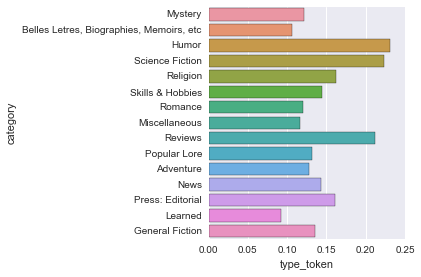

In [4]:
df = pd.DataFrame(type_toke_dict.items(), columns=['category', 'type_token'])
sns.factorplot(y='category', x='type_token', data=df, kind='bar', orient='h', size=4, aspect=1.5)

# MASC corpus

I've discovered one additional corpus that may be of use to us. The Manually Annotated Sub-Corpus is a subset of the Open American National Corpus that has been manually annotated for a number of features. Most interesting for us is that it has been anotated for entities (people, organizations, locations, and dates).

The American National Corpus provides a number of ways of accessing this data. The [web interface](http://www.anc.org:8080/ANC2Go/) is the most straightforward. One can see that the data exists in a number of categories. For the efforts below, I've limited it to those *written* categories that are closest to what one would expect in a book - essays, ficlets, fiction, govt docs, newspaper, non-fiction, technical, and travel-guides. I've not attempted to separate these into categories. For the moment, I'm most interested in the distribution of entity categories.

In [1]:
import lxml.etree as etree
from bs4 import BeautifulSoup
import glob

files = glob.glob('data/masc_NER/*.xml')
entities = {'person': 0, 'org':0, 'location':0, 'date':0}
total_tokens = 0
for f in files:
    xml_data = open(f).read()
    soup = BeautifulSoup(xml_data, 'lxml')
    for i in soup.find_all('p'):
        for item in i:
            total_tokens += 1
            if item.name in ['person', 'org', 'location', 'date']:
                entities[item.name] += 1
        #print i.string
        #if i.parent in ['person', 'org', 'date', 'location']:
        #    print i.parent
    #print(soup.prettify())


In [2]:
for i in entities.keys():
    print('There are ' + str(entities[i]) + ' instances of ' + str(i))
print('***** ' + str(total_tokens) + ' tokens ******')

There are 1492 instances of date
There are 3323 instances of person
There are 2600 instances of location
There are 1312 instances of org
***** 409862 tokens ******
